In [175]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
mouse_drug_data

clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)
clinical_trial_data

# Combine the data into a single dataset
merged_data = pd.merge(clinical_trial_data, mouse_drug_data,on="Mouse ID", how="left")

# Display the data table for preview
merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [176]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
drug_timepoint_mean = merged_data.groupby(["Drug","Timepoint"]).mean()["Tumor Volume (mm3)"]
drug_timepoint_mean

# Convert to DataFrame
tumor_response_treatment_mean = pd.DataFrame(drug_timepoint_mean)

# Preview DataFrame
tumor_response_treatment_mean

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325
...                                 ...
Zoniferol 25                  55.432935
          30                  57.713531
          35                  60.089372
          40                  62.916692
          45                  65.960888

[100 rows x 1 columns]

In [177]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
drug_timepoint_std_error = merged_data.groupby(["Drug","Timepoint"]).sem()["Tumor Volume (mm3)"]
drug_timepoint_std_error

# Convert to DataFrame
tumor_response_treatment_stderror = pd.DataFrame(drug_timepoint_std_error)

# Preview DataFrame
tumor_response_treatment_stderror.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [178]:
# Minor Data Munging to Re-Format the Data Frames - MEAN
tumor_response_treatment_mean = tumor_response_treatment_mean.reset_index()
tumor_response_treatment_mean

tumor_response_treatment_mean = tumor_response_treatment_mean.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')


In [179]:
# Preview that Reformatting worked
tumor_response_treatment_mean.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [180]:
# Minor Data Munging to Re-Format the Data Frames - Std Error
tumor_response_treatment_stderror = tumor_response_treatment_stderror.reset_index()
tumor_response_treatment_stderror

tumor_response_treatment_stderror = tumor_response_treatment_stderror.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')


In [181]:
# Preview that Reformatting worked
tumor_response_treatment_stderror.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


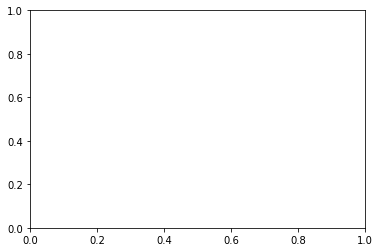

In [145]:
# Generate the Plot (with Error Bars)
x_axis = tumor_response_treatment_mean.index.unique().tolist()
x_axis

# Plot the chart
fig, ax=plt.subplots()

# # for drug in drugs:
# ax.errorbar(x_axis, tumor_response_treatment_mean, tumor_response_treatment_stderror, marker="+", label=drug)


# Save the Figure
#plt.savefig("tumor_response_to_treatment.png")


In [ ]:
# Show the Figure
# plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [189]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metastatic_drug_timepoint_mean = merged_data.groupby(["Drug","Timepoint"]).mean()["Metastatic Sites"]
metastatic_drug_timepoint_mean

# Convert to DataFrame
metastatic_response_treatment_mean = pd.DataFrame(metastatic_drug_timepoint_mean)

# Preview DataFrame
metastatic_response_treatment_mean.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [190]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metastatic_drug_timepoint_std_error = merged_data.groupby(["Drug","Timepoint"]).sem()["Metastatic Sites"]
metastatic_drug_timepoint_std_error

# Convert to DataFrame
metastatic_response_treatment_stderror = pd.DataFrame(metastatic_drug_timepoint_std_error)

# Preview DataFrame
metastatic_response_treatment_stderror.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [184]:
# Minor Data Munging to Re-Format the Data Frames - Mean
metastatic_response_treatment_mean = metastatic_response_treatment_mean.reset_index()
metastatic_response_treatment_mean

metastatic_response_treatment_mean = metastatic_response_treatment_mean.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')


In [185]:
# Preview that reformatting worked - Mean
metastatic_response_treatment_mean

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [186]:
# Minor Data Munging to Re-Format the Data Frames - Std Error
metastatic_response_treatment_stderror = metastatic_response_treatment_stderror.reset_index()
metastatic_response_treatment_stderror

metastatic_response_treatment_stderror = metastatic_response_treatment_stderror.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')

In [188]:
# Preview that reformatting worked - Std Error
metastatic_response_treatment_stderror

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


In [ ]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [195]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_drug_timepoint_count = merged_data.groupby(["Drug","Timepoint"]).count()["Mouse ID"]
mice_drug_timepoint_count

# Convert to DataFrame
mice_count = pd.DataFrame(mice_drug_timepoint_count)

# Preview DataFrame
mice_count.head()

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [196]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


# Minor Data Munging to Re-Format the Data Frames - Mean
mice_count = mice_count.reset_index()
mice_count

mice_count = mice_count.pivot(index='Timepoint', columns='Drug', values='Mouse ID')


In [198]:
# Preview that reformatting worked - Std Error
mice_count.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [ ]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)